# Figure 3: Map colored by surface mass load

### 1. Load packages

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from global_land_mask import globe
import scipy.stats as stats
import os
import importlib
import geopandas as gpd
# from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

# file containing functions:
import loadquakes
importlib.reload(loadquakes)
plt.style.use('fivethirtyeight')

ERROR 1: PROJ: proj_create_from_database: Open of /home/amand4/anaconda3/envs/syamsul_2023/share/proj failed


### 2. Load datasets

In [2]:
# GRACE data
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202201.GLO.RL06M.MSCNv02CRI.nc")
catalog = pd.read_csv('catalog.csv')
etas_declustered = pd.read_csv('etas_declustered.csv')
NND_declustered = pd.read_csv('NND_declustered.csv') # eta0 = 10
NND_declustered_v2 = pd.read_csv('NND_declustered_v2.csv') # eta0 = 10**3

### 3. Plot the SLIQs from the full catalog with highest conditional probability

In [3]:
sliq_full=catalog.sort_values('cp',ascending=False)
sliq_full=sliq_full.reset_index()
sliq_full=sliq_full.drop(['index'], axis=1)

sliq_full['dmass']=sliq_full['dmass'].astype(float)

In [4]:
# Not used in the paper; need to reset the circle_scale variable with new function
# loadquakes.load_map_cb(catalog,sliq_full[sliq_full.cp>1.59],sliq_full[sliq_full.cp>1.59].dmass,
#                 'SLIQs with highest conditional probability (full catalog)',20,40,11,circle_scale=1e-6)
# plt.show()

### 4. Plot the SLIQs from the NND catalog 

In [5]:
sliq_nnd=NND_declustered.sort_values('cp',ascending=False)
sliq_nnd=sliq_nnd.reset_index()
sliq_nnd=sliq_nnd.drop(['index'], axis=1)
sliq_nnd['dmass']=sliq_nnd['dmass'].astype(float)

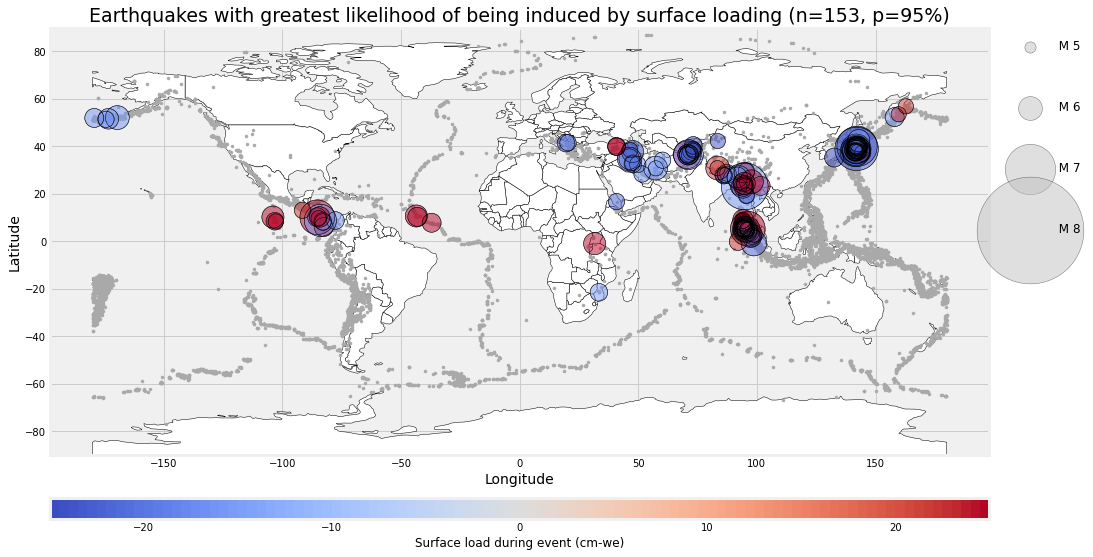

In [6]:
importlib.reload(loadquakes)
plt.style.use('fivethirtyeight')

cp_thr = 1.5
nthr=len(sliq_nnd[sliq_nnd.cp>cp_thr])
loadquakes.load_map_cb(catalog,sliq_nnd[sliq_nnd.cp>cp_thr],sliq_nnd[sliq_nnd.cp>cp_thr].dmass,
                f'Earthquakes with greatest likelihood of being induced by surface loading (n={nthr}, p=95%)',
                       -25,25,markersize_scale=1.5)
plt.show()

### 5. Plot the SLIQs from the ETAS declustered catalog with highest conditional probability

In [7]:
sliq_etas=etas_declustered.sort_values('cp',ascending=False)
sliq_etas=sliq_etas.reset_index()
sliq_etas=sliq_etas.drop(['index'], axis=1)
sliq_etas['dmass']=sliq_etas['dmass'].astype(float)
# sliq_etas.sort_values('dmass')

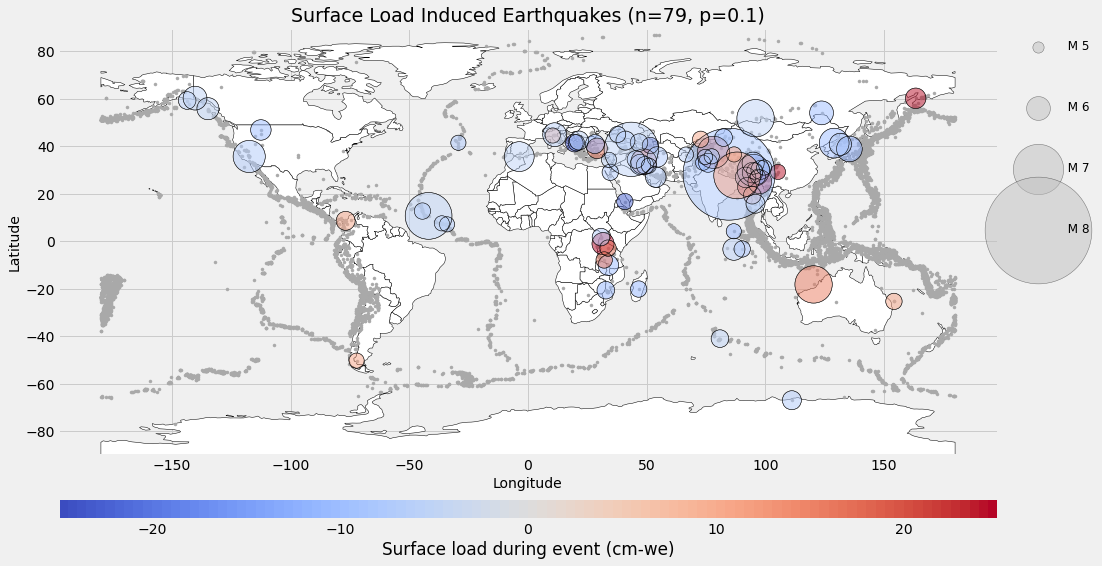

In [8]:
importlib.reload(loadquakes)

cp_thr = 1.5
nthr = len(sliq_etas[sliq_etas.cp>cp_thr])
sliq_etas_sig = sliq_etas[sliq_etas.cp>cp_thr]

plt.style.use('fivethirtyeight')
loadquakes.load_map_cb(catalog,
                       sliq_etas_sig,
                       sliq_etas_sig.dmass,
                       f'Surface Load Induced Earthquakes (n={nthr}, p=0.1)',
                       -25,25,markersize_scale=1.5)
plt.show()

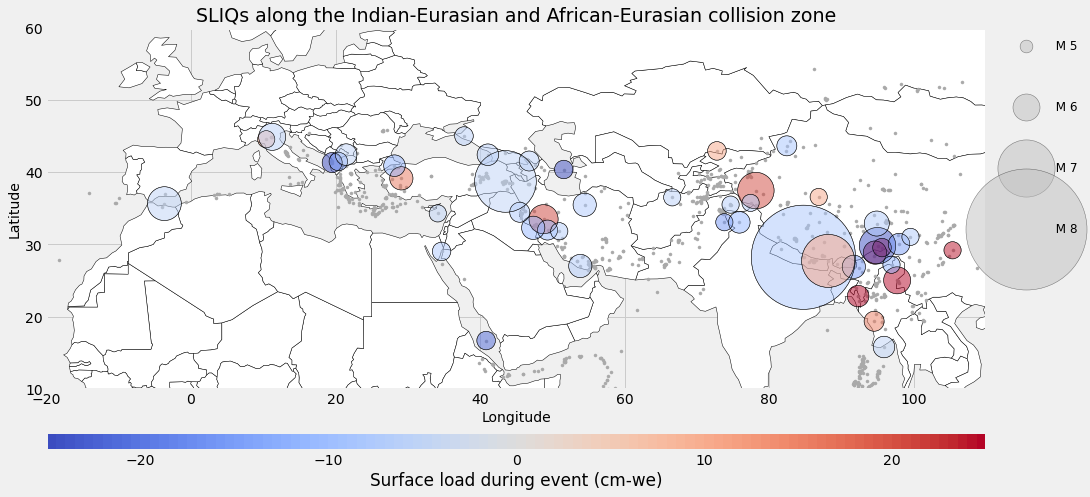

In [9]:
nyingchi=sliq_etas_sig[(sliq_etas_sig.latitude>10) & 
          (sliq_etas_sig.latitude<50) & 
          (sliq_etas_sig.longitude>-40) & 
          (sliq_etas_sig.longitude<110)]

ax=loadquakes.load_map_cb(catalog,nyingchi,nyingchi.dmass,
                'SLIQs along the Indian-Eurasian and African-Eurasian collision zone',
                          -25,25,circle_scale=0.09,markersize_scale=1.5)
ax.set_xlim([-20,110])
ax.set_ylim([10,60])
plt.show()

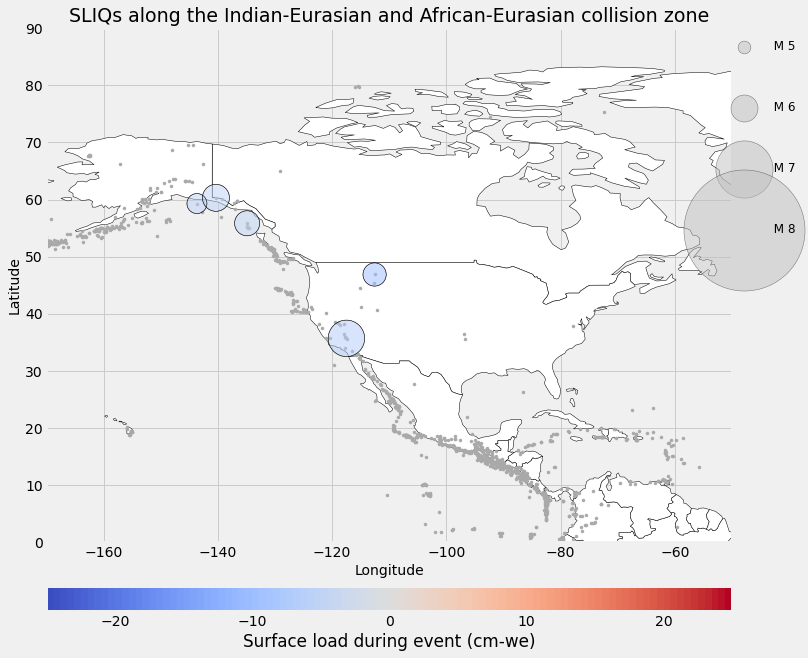

In [10]:
na=sliq_etas_sig[(sliq_etas_sig.latitude>10) & 
          (sliq_etas_sig.latitude<90) & 
          (sliq_etas_sig.longitude>-160) & 
          (sliq_etas_sig.longitude<-50)]

ax=loadquakes.load_map_cb(catalog,na,na.dmass,
                'SLIQs along the Indian-Eurasian and African-Eurasian collision zone',
                          -25,25,circle_scale=0.09,markersize_scale=1.5)
ax.set_xlim([-170,-50])
ax.set_ylim([0,90])
plt.show()

In [11]:
np.mean(sliq_etas_sig.dmass)

-2.062372852243538

In [12]:
np.median(sliq_etas_sig.dmass)

-6.4961061491471686

In [13]:
np.mean(np.array(ds.lwe_thickness).flatten())

-0.65387517841372

In [14]:
np.median(np.array(ds.lwe_thickness).flatten())

0.749170696239575

In [15]:
sum(sliq_etas_sig.dmass>0)

21